In [406]:

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np


In [407]:
#讀資料
rawdataAll = pd.read_csv('data/flag.csv')
rawdataAll.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [408]:
df = rawdataAll
print(df.shape)

(194, 30)


In [433]:
#string to float
df['29'] = pd.factorize(df['29'])[0] + 1
df['30'] = pd.factorize(df['30'])[0] + 1
df['18'] = pd.factorize(df['18'])[0] + 1
df['1'] = pd.factorize(df['1'])[0] + 1


In [435]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,1,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,1,1
1,2,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,2,2
2,3,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,3,3
3,4,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,4,2
4,5,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,4,2


0    40
1    60
2    36
3     8
4     4
5    27
6    15
7     4
Name: 7, dtype: int64


Text(0.5, 0, 'class')

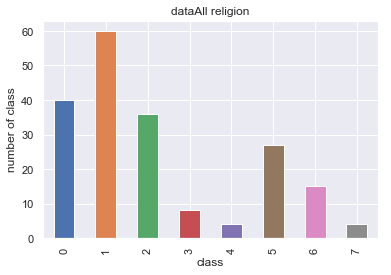

In [447]:
#統計每個類別數量(全部資料)
allTarget = target.value_counts(sort=False)
print(allTarget)

ax = allTarget.plot(kind='bar',title='dataAll religion')
ax.set_ylabel('number of class')
ax.set_xlabel('class')

In [443]:
allTarget

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: 7, dtype: int64

0    28
1    44
2    31
3     7
4     3
5    20
6     8
7     4
Name: 7, dtype: int64


Text(0.5, 0, 'class')

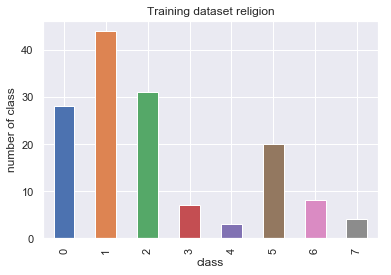

In [446]:
#統計每個類別數量(訓練資料)
trainTarget = Y_train.value_counts(sort=False)
print(trainTarget)
ax = trainTarget.plot(kind='bar',title='Training dataset religion')
ax.set_ylabel('number of class')
ax.set_xlabel('class')

In [412]:
#切分特徵及答案
features = df.loc[:, ~df.columns.isin(['1','7'])]
target = df['7']

In [413]:
#切分訓練及測試
X_train, X_test,Y_train, Y_test = train_test_split(
    features, target, test_size=0.25, random_state=5)

0    12
1    16
2     5
3     1
4     1
5     7
6     7
Name: 7, dtype: int64


Text(0.5, 0, 'class')

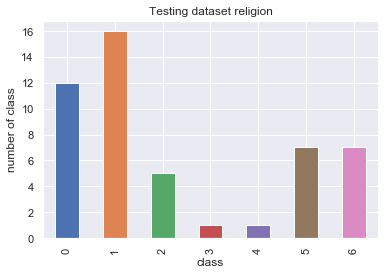

In [445]:
#畫原始分布
testTarget = Y_test.value_counts(sort=False)
print(testTarget)
ax = testTarget.plot(kind='bar',title='Testing dataset religion')
ax.set_ylabel('number of class')
ax.set_xlabel('class')

In [415]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()

In [487]:
#建立貝氏分類器
nbm = GaussianNB()
nbm.fit(X_train,Y_train)
Y_predict = nbm.predict(X_test)

In [488]:
Y_predict = nbm.predict(X_test)

In [489]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.40816326530612246

In [490]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.67      0.62      0.65        16
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      0.86      0.63         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         0

   micro avg       0.41      0.41      0.41        49
   macro avg       0.22      0.23      0.21        49
weighted avg       0.43      0.41      0.40        49



C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alant\Anaconda3\lib\sit

[[ 4  2  1  0  3  1  1  0]
 [ 2 10  0  0  2  1  1  0]
 [ 0  1  0  0  1  1  1  1]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  6  1  0]
 [ 1  1  1  0  1  2  0  1]
 [ 0  0  0  0  0  0  0  0]]


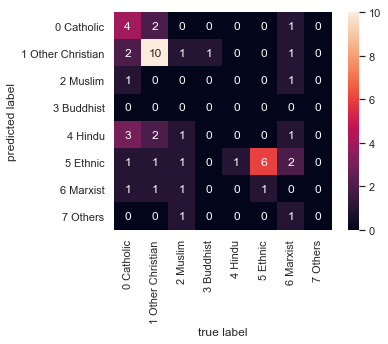

In [420]:

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_predict)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [421]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
Y_predict=clf.predict(X_test)

In [426]:

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.4489795918367347

In [427]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.65      0.69      0.67        16
           2       0.33      0.60      0.43         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.67      0.57      0.62         7
           6       0.60      0.43      0.50         7

   micro avg       0.57      0.57      0.57        49
   macro avg       0.41      0.41      0.40        49
weighted avg       0.58      0.57      0.57        49



C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 3  5  1  0  0  3  0]
 [ 2 12  0  0  0  2  0]
 [ 0  1  3  0  0  1  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 2  1  1  0  0  3  0]
 [ 2  0  1  1  0  2  1]]


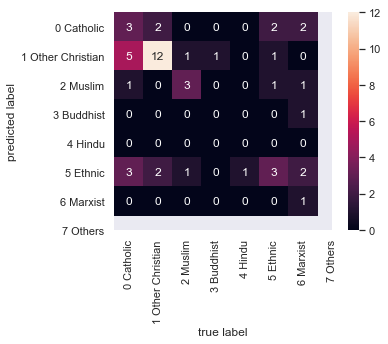

In [428]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_predict)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [429]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
Y_predict=neigh.predict(X_test)

In [430]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.5102040816326531

[[ 9  2  0  0  0  1  0]
 [ 2 13  1  0  0  0  0]
 [ 1  3  1  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 2  2  1  0  0  2  0]
 [ 4  0  1  0  0  2  0]]


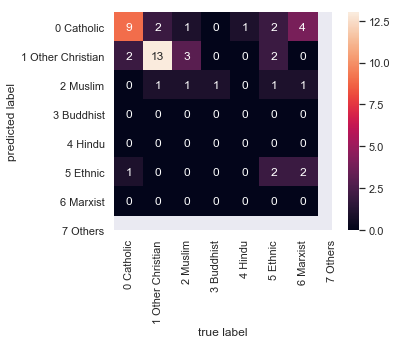

In [431]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_predict)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

0.6326530612244898
[[10  1  0  0  0  1  0]
 [ 2 12  0  0  0  1  1]
 [ 0  0  1  3  0  1  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  7  0]
 [ 2  4  0  1  0  0  0]]


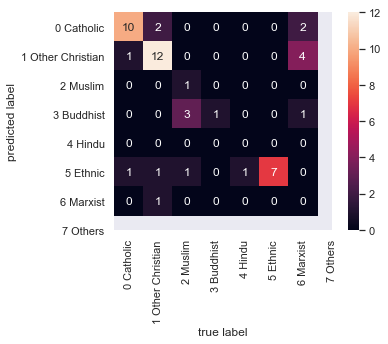

In [486]:
#切分特徵及答案2
features2 = df.loc[:, df.columns.isin(['2','6','24','29'])]
target2 = df['7']
X_train2, X_test2,Y_train2, Y_test2 = train_test_split(
    features2, target2, test_size=0.25, random_state=5)
#建立貝氏分類器
nbm2 = GaussianNB()
nbm2.fit(X_train2,Y_train2)
Y_predict2 = nbm2.predict(X_test2)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test2, Y_predict2))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test2, Y_predict2)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, cbar=True, 
           xticklabels=target_names, yticklabels=target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [491]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2, Y_predict2))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.71      0.75      0.73        16
           2       1.00      0.20      0.33         5
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         1
           5       0.64      1.00      0.78         7
           6       0.00      0.00      0.00         7

   micro avg       0.63      0.63      0.63        49
   macro avg       0.47      0.54      0.42        49
weighted avg       0.60      0.63      0.58        49



C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
